#### Import

In [20]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from datetime import *
from netCDF4 import *

#### Exercise 1


In [5]:
data=xr.open_dataset("sst.nc")
sst_nino34=data.sst.sel(lat=slice(-5,5),lon=slice(190,240))
tmp=sst_nino34.groupby('time.month')
tmp1=tmp-tmp.mean(dim="time")
index_nino34=tmp1.mean(dim=["lat","lon"])

([<matplotlib.axis.XTick at 0x1bcaef595e0>,
 [Text(-21, 0, '1980'),
  Text(39, 0, '1985'),
  Text(99, 0, '1990'),
  Text(159, 0, '1995'),
  Text(219, 0, '2000'),
  Text(279, 0, '2005'),
  Text(339, 0, '2010'),
  Text(399, 0, '2015'),
  Text(459, 0, '2020'),
  Text(519, 0, '2025')])

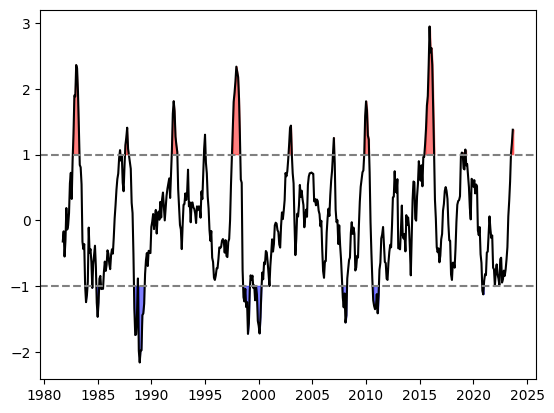

In [19]:
plt.plot(index_nino34, 'k')
# Draw the dashed horizontal line at y=1 and y=-1
plt.axhline(y=1, color='gray', linestyle='--')
plt.axhline(y=-1, color='gray', linestyle='--')
# Fill color
plt.fill_between(np.linspace(0,504,504),index_nino34, 1, where=(index_nino34 > 1), color='red', alpha=0.5)
plt.fill_between(np.linspace(0,504,504),index_nino34, -1, where=(index_nino34 < -1), color='blue', alpha=0.5)

# Year | start at sep 1981 and end at august 2023
x_ticks = np.arange(-21, 520, 5*12)
plt.xticks(x_ticks, [f"{1980 + i}" for i in range(0,46,5)])


#### Exercise 2

In [49]:
precipe_file = r"precipe.nc"
precipe_data = xr.open_dataset(precipe_file)
sst_nino34=precipe_data.precip.sel(lat=slice(-5,5),lon=slice(190,240))
tmp=sst_nino34.groupby('time.month')
tmp1=tmp-tmp.mean(dim="time")
index_nino34=tmp1.mean(dim=["lat","lon"])

In [36]:
lon = precipe_data.coords['lon'].values
lat = precipe_data.coords['lat'].values

data = precipe_data.precip.values

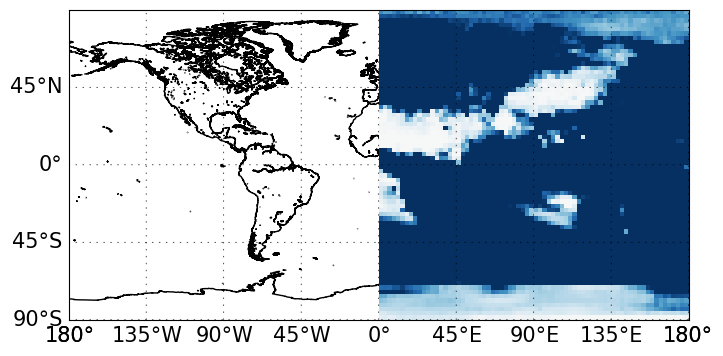

In [45]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(1,1,1)

#basemap setting
lon_min = -180
lon_max = 180
lat_min = -90
lat_max = 90
map2 = Basemap(projection='merc',llcrnrlon=lon_min,llcrnrlat=lat_min,
    urcrnrlon=lon_max,urcrnrlat=lat_max,resolution='i',epsg=4326)

#some decorations
# map2.fillcontinents(zorder=0)
map2.drawcoastlines(zorder=0)
# map2.drawcountries(linewidth=1,color='k')

parallels = np.arange(-90.,90., np.around((lat_max-lat_min)/4, decimals=1)) 	#lat
meridians = np.arange(-180.,180., np.around((lat_max-lat_min)/4, decimals=1))
map2.drawparallels(parallels,linewidth=0.5,dashes=[2,8],labels=[1,0,0,0],fontsize=15, zorder=12) # left, right, top or bottom
map2.drawmeridians(meridians,linewidth=0.5,dashes=[2,8],labels=[0,0,0,1],fontsize=15, zorder=12)

cm = plt.pcolormesh( lon , lat , data[59,:,:],vmin = -0.6,vmax = 0.6,cmap='RdBu')

plt.show()